Alejandra Gavino-Dias

# Prática 10 - MLP

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from tqdm import tqdm
import time

Esto es para quitar los warnings (al importar el dataset salía uno)

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
datos = fetch_openml(data_id = 1560)
X = datos.data
X = MinMaxScaler().fit_transform(X)
y = datos.target

In [3]:
resul = pd.DataFrame(index = range(5,51,5), columns=['Entrena', 'Verifica', 'T.Ejecucion'])
resul.index.name = 'Neuronas Ocultas'

In [34]:
K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)
k = 0
for t in range(5,51,5):
    r_reg = pd.DataFrame(columns=['Entrena', 'Verifica', 'T.Ejecucion'])
    for train_index, test_index in tqdm(kf.split(X),total=kf.get_n_splits(X)):
        X_train = X[train_index, :]
        y_train = y[train_index]
        X_test = X[test_index, :]
        y_test = y[test_index]
        reg = MLPClassifier(hidden_layer_sizes=t, max_iter=2000)
        ini = time.time()
        reg.fit(X_train, y_train)
        y_predict = reg.predict(X_test)
        entrena = reg.score(X_train, y_train)
        verifica = reg.score(X_test, y_test)
        fin = time.time()
        r_reg.loc[k, :] = [entrena, verifica, fin-ini]
        k += 1
    r_reg.index.name = 'Fold'
    print(r_reg)
    print("\nMEDIA para capa oculta de tamaño: ",t)
    print("Entrena:\t",np.mean(r_reg['Entrena']))
    print("Verifica:\t",np.mean(r_reg['Verifica']))
    print("T.Ejecucion:\t",np.mean(r_reg['T.Ejecucion']))
    print("Tiempo total:\t",np.sum(r_reg['T.Ejecucion']))
    resul.loc[t, :] = [np.mean(r_reg['Entrena']), np.mean(r_reg['Verifica']), np.sum(r_reg['T.Ejecucion'])]
resul

100%|███████████████████████████████████████████| 10/10 [00:12<00:00,  1.26s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
0      0.99425  0.962441    1.599745
1     0.991113   0.99061    0.919188
2     0.991636  0.971831    0.763768
3     0.990068  0.971831    0.729494
4     0.991636       1.0    1.275403
5     0.991113       1.0    1.234296
6     0.991641  0.990566    1.056653
7     0.992163  0.995283    1.075001
8     0.992163       1.0    1.825784
9     0.992163  0.985849    2.112886

MEDIA para capa oculta de tamaño:  5
Entrena:	 0.9917946612874241
Verifica:	 0.9868411728231022
T.Ejecucion:	 1.2592217683792115
Tiempo total:	 12.592217683792114


100%|███████████████████████████████████████████| 10/10 [00:13<00:00,  1.31s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
10    0.994773  0.957746    1.810224
11    0.991636   0.99061     1.57878
12    0.992159  0.971831    1.619081
13    0.992159  0.985915    1.291727
14    0.991636       1.0    1.782525
15    0.992159       1.0    1.435561
16    0.992685  0.990566    0.986964
17    0.992163  0.990566    0.776959
18    0.990596       1.0    0.816274
19    0.992685  0.981132    0.957562

MEDIA para capa oculta de tamaño:  10
Entrena:	 0.9922651265252703
Verifica:	 0.9868367437328374
T.Ejecucion:	 1.3055657625198365
Tiempo total:	 13.055657625198364


100%|███████████████████████████████████████████| 10/10 [00:09<00:00,  1.02it/s]


       Entrena  Verifica T.Ejecucion
Fold                                
20    0.994773  0.962441    1.144678
21    0.992682   0.99061     1.35046
22    0.992159  0.971831    0.790644
23    0.993204  0.985915    0.909744
24    0.992159       1.0    0.816915
25    0.992682       1.0    0.984358
26    0.993208  0.990566    0.972902
27    0.992685  0.995283    0.890069
28    0.992685       1.0    0.902698
29    0.992685  0.966981    1.028043

MEDIA para capa oculta de tamaño:  15
Entrena:	 0.9928922496409924
Verifica:	 0.9863628310744973
T.Ejecucion:	 0.9790508985519409
Tiempo total:	 9.79050898551941


100%|███████████████████████████████████████████| 10/10 [00:12<00:00,  1.23s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
30    0.995295  0.962441    0.853243
31    0.993204   0.99061    2.219247
32    0.992682  0.971831    1.405482
33    0.992682   0.99061    0.788497
34    0.992682  0.995305    1.250449
35    0.992682       1.0    1.024044
36    0.992685  0.990566    1.430858
37    0.993208  0.990566    1.366486
38    0.992163       1.0    0.717745
39    0.992685  0.981132    1.165051

MEDIA para capa oculta de tamaño:  20
Entrena:	 0.9929968247829706
Verifica:	 0.9873062273009126
T.Ejecucion:	 1.2221101999282837
Tiempo total:	 12.221101999282837


100%|███████████████████████████████████████████| 10/10 [00:19<00:00,  1.95s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
40    0.995818  0.962441    1.175631
41    0.992159   0.99061    1.216841
42    0.992682  0.981221    2.468104
43    0.993727  0.981221    2.458723
44    0.993204  0.995305      2.7129
45    0.993727       1.0    3.194562
46    0.992685  0.990566    1.051604
47    0.993208  0.981132    1.875992
48    0.992685       1.0     2.17781
49     0.99373  0.948113     1.07141

MEDIA para capa oculta de tamaño:  25
Entrena:	 0.9933626602561476
Verifica:	 0.9830609442820446
T.Ejecucion:	 1.9403576374053955
Tiempo total:	 19.403576374053955


100%|███████████████████████████████████████████| 10/10 [00:12<00:00,  1.25s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
50    0.995295  0.962441    0.980342
51    0.995295   0.99061    1.968698
52    0.992682  0.981221    1.154533
53    0.993204   0.99061    1.199772
54    0.995295  0.995305    1.527207
55    0.992159       1.0     1.27007
56     0.99373  0.990566    1.118448
57    0.993208  0.985849    0.902415
58    0.992685       1.0    1.267576
59     0.99373  0.971698    1.033653

MEDIA para capa oculta de tamaño:  30
Entrena:	 0.9937285230406705
Verifica:	 0.98683010009744
T.Ejecucion:	 1.2422715663909911
Tiempo total:	 12.422715663909912


100%|███████████████████████████████████████████| 10/10 [00:14<00:00,  1.41s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
60    0.995818  0.962441    1.054109
61    0.992682   0.99061    1.234457
62    0.995295  0.981221    1.616398
63    0.994773  0.985915    1.260204
64    0.992682  0.995305    1.102488
65    0.993204       1.0    2.232294
66    0.995298  0.976415    1.956218
67    0.994253  0.990566    1.490201
68    0.993208       1.0     1.17483
69    0.993208  0.948113    0.896566

MEDIA para capa oculta de tamaño:  35
Entrena:	 0.9940420299758402
Verifica:	 0.9830587297369121
T.Ejecucion:	 1.4017765045166015
Tiempo total:	 14.017765045166016


100%|███████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
70    0.996864  0.962441    1.810085
71    0.995818   0.99061    1.876762
72    0.992682  0.971831    1.233353
73    0.996864  0.985915    2.315098
74    0.992682  0.995305    1.075158
75    0.995295       1.0    1.830838
76    0.994775  0.985849    1.593712
77    0.994775  0.981132    1.739967
78    0.995298       1.0    1.963179
79    0.993208  0.957547    0.980942

MEDIA para capa oculta de tamaño:  40
Entrena:	 0.994826029460202
Verifica:	 0.9830631588271768
T.Ejecucion:	 1.641909384727478
Tiempo total:	 16.41909384727478


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.89s/it]


       Entrena  Verifica T.Ejecucion
Fold                                
80    0.995818  0.962441    1.257291
81    0.996341   0.99061    2.659491
82    0.992682  0.981221    1.201182
83    0.998432  0.985915     2.25593
84    0.996341   0.99061    1.759757
85    0.995818       1.0    2.235383
86     0.99582  0.966981    1.989814
87    0.996343  0.976415    1.973248
88    0.995298       1.0    1.710204
89    0.996865  0.924528    1.777896

MEDIA para capa oculta de tamaño:  45
Entrena:	 0.9959757278610137
Verifica:	 0.9778722650367616
T.Ejecucion:	 1.8820196390151978
Tiempo total:	 18.820196390151978


100%|███████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]

       Entrena  Verifica T.Ejecucion
Fold                                
90    0.997386  0.962441    2.259998
91    0.995295  0.985915    2.516286
92    0.995295  0.985915    2.072979
93    0.993727  0.985915    1.444593
94    0.996864  0.995305    2.393231
95    0.995295       1.0    2.008095
96    0.995298  0.976415    1.643455
97     0.99373  0.981132     0.88635
98    0.995298       1.0    1.724441
99    0.994775  0.948113    1.380237

MEDIA para capa oculta de tamaño:  50
Entrena:	 0.9952964400753574
Verifica:	 0.9821153335104971
T.Ejecucion:	 1.8329664945602417
Tiempo total:	 18.329664945602417


,Entrena,Verifica,T.Ejecucion
Neuronas Ocultas,,,
5,0.991795,0.986841,12.592218
10,0.992265,0.986837,13.055658
15,0.992892,0.986363,9.790509
20,0.992997,0.987306,12.221102
25,0.993363,0.983061,19.403576
30,0.993729,0.98683,12.422716
35,0.994042,0.983059,14.017765
40,0.994826,0.983063,16.419094
45,0.995976,0.977872,18.820196


## MLP Óptimo y más rápido

In [35]:
print("Tamaño optimo (mejor resultado) = ",resul.index[np.argmax(resul['Verifica'].values)])
print("Tamaño optimo (tiempo minimo) = ",resul.index[np.argmin(resul['T.Ejecucion'].values)])

Tamaño optimo (mejor resultado) =  20
Tamaño optimo (tiempo minimo) =  15


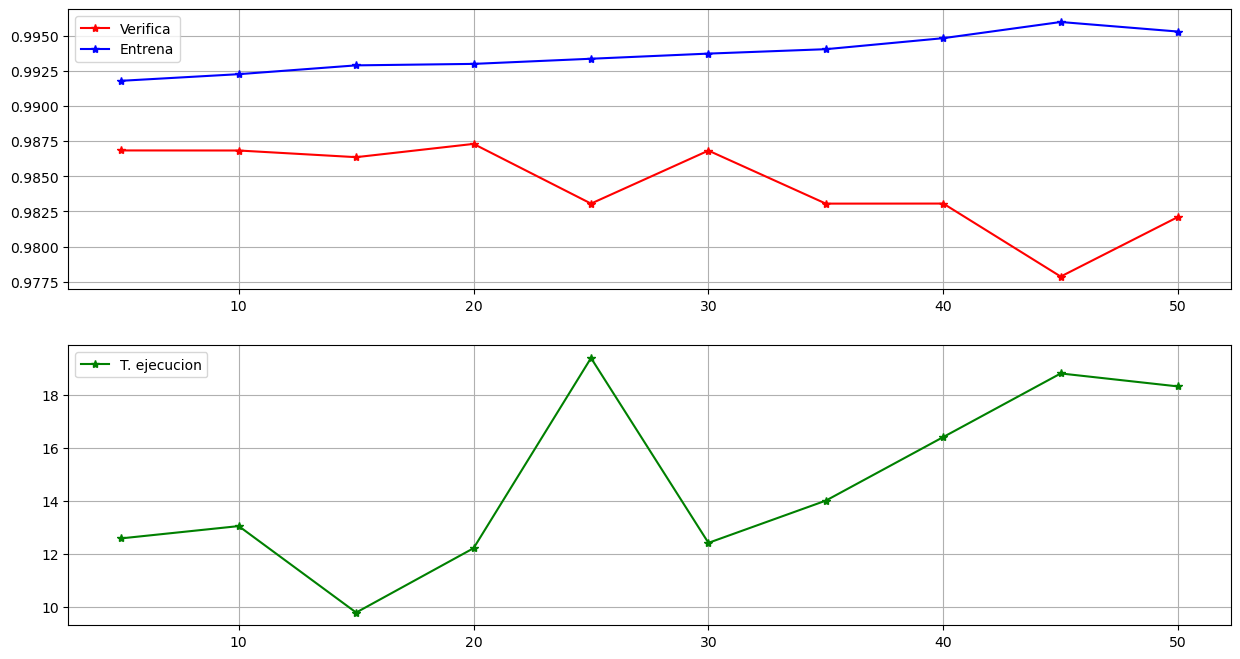

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(range(5,51,5), resul['Verifica'].values, 'r*-', label='Verifica')
ax[0].plot(range(5,51,5), resul['Entrena'].values, 'b*-', label='Entrena')
ax[0].legend()
ax[0].grid()
ax[1].plot(range(5,51,5), resul['T.Ejecucion'].values, 'g*-', label='T. ejecucion')
ax[1].legend()
ax[1].grid()